# Image Edge Detection Filter (Convolution 2D)
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com

## Imports & Configurations

In [1]:
# General Imports
import numpy as np
import scipy.signal as signal
import nbimporter

# Image
from PIL import Image

# Import Convolution2D form Convolution2D.ipynb
from Convolution2D import Convolution2D

#Display ang Plots
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display
from displayUtils import show_web

# Logging & Debbuging
import logging

Importing Jupyter notebook from Convolution2D.ipynb


In [2]:
# Logging Configuration
import sys
# Create logger
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger()

# Create STDERR handler
handler = logging.StreamHandler(sys.stderr)

# Set STDERR handler as the only handler 
logger.handlers = [handler]

In [3]:
show_web("https://en.wikipedia.org/wiki/Edge_detection")

In [4]:
show_web("https://en.wikipedia.org/wiki/Kernel_(image_processing)")

## Edge Detection Simple Kernel

In [5]:
# Edge Detecttion Kernel
kernel=np.array([[-1, -1, -1],
                [-1,  8, -1],
                [-1, -1, -1]])

## Load Image

In [6]:
im = np.asarray(Image.open('./img/guitar.jpg'))
I = np.array(Image.fromarray(np.uint8(im)))

## Convolve Image with Kernel

In [7]:
convR=Convolution2D(I[:,:,0],kernel)
convG=Convolution2D(I[:,:,1],kernel)
convB=Convolution2D(I[:,:,2],kernel)

## Normalization

In [8]:
# Define a function to normalize an array
def normalize(arr):
    maxValue=np.max(arr)
    minValue=np.min(arr)
    for i,value in np.ndenumerate(arr):
        if ((maxValue-minValue) !=0):
            arr[i]=np.round(255*(value-minValue)/(maxValue-minValue)).astype(np.uint8)
        else:
            arr[i]=255
    return arr

In [9]:
#Normalize arrays
convR=normalize(convR)
convG=normalize(convG)
convB=normalize(convB)

## Convert to BW

In [10]:
convR[convR < 128]=0
convR[convR >= 128]=255
convG[convG < 128]=0
convG[convG >= 128]=255
convB[convB < 128]=0
convB[convB >= 128]=255

In [11]:
# Stack RGB back to Image
edgeImage=np.stack((convR,convG,convB), axis=2).astype(np.uint8)

## Display Edge Detection

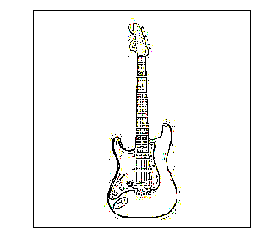

In [12]:
# Display Edge Detection Filtered Image
plt.figure()
plt.axis('off')
plt.imshow(edgeImage);

## Sobel Filter

In [13]:
show_web("https://en.wikipedia.org/wiki/Sobel_operator")

## Sobel Kernels

In [14]:
SobelX=np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
SobelY=np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

In [15]:
#Load Image as BW
Im=np.asarray(Image.open('./img/guitar.jpg').convert('L'))
Img = np.array(Image.fromarray(np.uint8(Im)))

## Convolution with Sobel Kernels

In [16]:
imageSobelXR=Convolution2D(I[:,:,0],SobelX);
imageSobelYR=Convolution2D(I[:,:,0],SobelY);
imageSobelR=np.sqrt(imageSobelXR**2+imageSobelYR**2)

imageSobelXG=Convolution2D(I[:,:,1],SobelX);
imageSobelYG=Convolution2D(I[:,:,1],SobelY);
imageSobelG=np.sqrt(imageSobelXG**2+imageSobelYG**2)

imageSobelXB=Convolution2D(I[:,:,2],SobelX);
imageSobelYB=Convolution2D(I[:,:,2],SobelY);
imageSobelB=np.sqrt(imageSobelXB**2+imageSobelYB**2)

#1 Channel BW
imageSobelX=Convolution2D(Img,SobelX);
imageSobelY=Convolution2D(Img,SobelY);
imageSobel=np.sqrt(imageSobelX**2+imageSobelY**2)

## Normalization

In [17]:
#Normalize arrays
imageSobelR=normalize(imageSobelR)
imageSobelG=normalize(imageSobelG)
imageSobelB=normalize(imageSobelB)

imageSobel=normalize(imageSobel)

## Reverse Colors

In [18]:
# Reverse
imageSobelR=255-imageSobelR
imageSobelG=255-imageSobelG
imageSobelB=255-imageSobelB

In [19]:
# Stack RGB back to Image
edgeImageSobel=np.stack((imageSobelR,imageSobelG,imageSobelB), axis=2).astype(np.uint8)

## Display Edge Detection Sobel

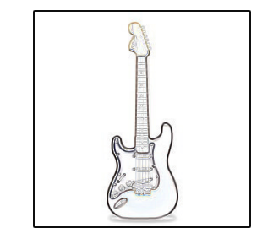

In [20]:
# Display Edge Detection Filtered Image
plt.figure()
plt.axis('off')
plt.imshow(edgeImageSobel);

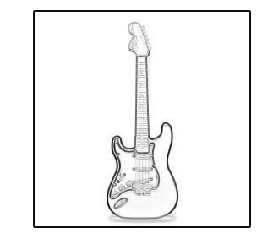

In [21]:
# Display Edge Detection Filtered Image
plt.figure()
plt.axis('off')
plt.imshow(imageSobel, cmap="gray_r");

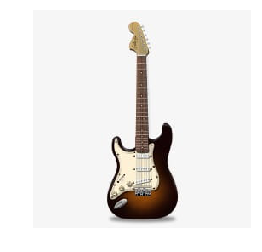

In [22]:
#Display Original Image
plt.figure()
plt.axis("off")
plt.imshow(im)